## [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html)

- training data: 50000
- testing data: 10000
- size: 32 * 32
- label: 0~9 integer map to airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [1]:
%matplotlib inline
from keras.datasets import cifar10
import keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Label is [1].


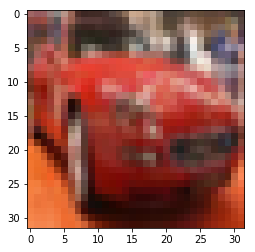

In [2]:
import matplotlib.pyplot as plt
index = 5 # 0 <= index < 50000
plt.imshow(x_train[index])
print("Label is {}.".format(y_train[index]))

In [3]:
nor_X_train = x_train / 255
nor_x_test = x_test / 255
print(nor_X_train.shape)
print(nor_x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
## convert label to one-of-N encoding
num_classes = 10
v_y_train = keras.utils.to_categorical(y_train, num_classes)
v_y_test = keras.utils.to_categorical(y_test, num_classes)
print("Shape of training labels: {}".format(v_y_train.shape))
print("Shape of testing labels: {}".format(v_y_test.shape))

Shape of training labels: (50000, 10)
Shape of testing labels: (10000, 10)


In [5]:
## Split validation set from training set
from sklearn.model_selection import train_test_split
nor_x_train, nor_x_val, v_y_train, v_y_val = train_test_split(
    nor_X_train, v_y_train, test_size=0.2, random_state=42)
print(nor_x_train.shape)
print(nor_x_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


## Convolutional Neural Network - CNN
> Because of using CNN, we do not need to reshape each data to 1-D vector form. 

> **Note: You still could do that and use CNN.**

> Suggested Readings for beginner:
- [A Beginner's Guide To Understanding Convolutional Neural Networks](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)
- [深度學習(2)--使用Tensorflow實作卷積神經網路(Convolutional neural network，CNN)](http://arbu00.blogspot.tw/2017/03/2-tensorflowconvolutional-neural.html)
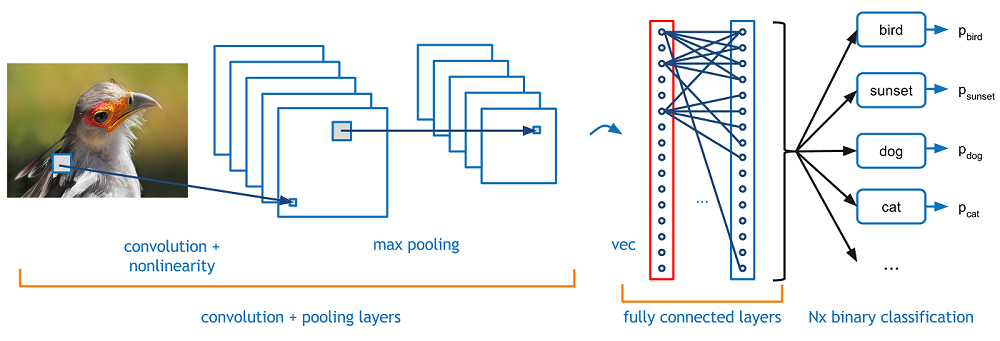

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os

## Data Augmentation
- Rotation/reflection: 隨機旋轉圖像一定角度;改變圖像內容方向
- flip: 沿著水平或垂直方向翻轉圖像
- zoom: 按照一定的比例放大或縮小圖像
- shift: 在圖像平面上對圖像以一定方式進行平移(隨機或人為指定平移範圍和平移方向)
- scale: 對圖像按照指定的scale進行放大或縮小;或者利用指定的scale改變圖像的模糊程度
- contrast: 在圖像的HSV空間中,改變飽和度Ｓ和亮度Ｖ分量（對Ｓ跟Ｖ進行指數運算）,並保持色調不變
- noise: 對圖像的每個像素加上隨機的noise
- color: 在圖像空間中進行ＰＣＡ,得到ＲＧＢ空間中三個特徵向量跟特徵值,得到原ＲＧＢ像素空間的 representation.
- more: google it

## ImageDataGenerator
- Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) indefinitely.
- You can use next(datagen) to get a batch of data

In [7]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(nor_x_train)

Label is [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.].


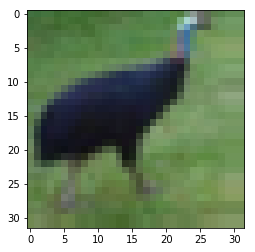

In [8]:
t_x, t_y = next(datagen.flow(nor_x_train, v_y_train, batch_size = 5))
plt.imshow(t_x[3]) # index form 0 ~ 4
print("Label is {}.".format(t_y[3]))

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=nor_x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [10]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
batch_size = 32
epochs = 3
num_predictions = 20

model.fit_generator(datagen.flow(nor_x_train, v_y_train,
                                     batch_size=batch_size),
                        steps_per_epoch= x_train.shape[0] // batch_size,   
                        epochs=epochs,
                        validation_data=(nor_x_val, v_y_val),
                        workers=4)

Epoch 1/3
1562/1562 [==============================] - 212s - loss: 1.8729 - acc: 0.3081 - val_loss: 1.5779 - val_acc: 0.4250
Epoch 2/3
1562/1562 [==============================] - 210s - loss: 1.6008 - acc: 0.4138 - val_loss: 1.4187 - val_acc: 0.4895
Epoch 3/3
1562/1562 [==============================] - 211s - loss: 1.4683 - acc: 0.4691 - val_loss: 1.3479 - val_acc: 0.5139


In [12]:
score = model.evaluate(nor_x_test, v_y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.34357249966
Test accuracy: 0.5157


Label is 6.


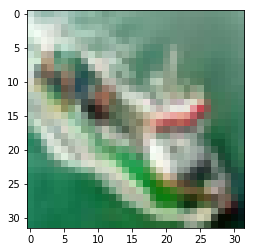

In [13]:
pred_index = 15
pred = model.predict_on_batch(nor_x_test[pred_index].reshape(-1, 32, 32, 3))
plt.imshow(x_test[pred_index], cmap="gray")
print("Label is {}.".format(np.argmax(pred)))